In [2]:
library(edgeR)
library(magrittr)
library(ggplot2)
#library(DESeq2)
library(MAST)
library(tidyr)
library(dplyr)
library(reshape)
library(Seurat)
#library(SeuratDisk)
require(scales)
library(gplots)
library(reshape2)
library(sceasy)
library(reticulate)

In [3]:
h5ad_file <- "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/Tumourcell_raw_no_nan.h5ad"

sceasy::convertFormat(h5ad_file, from="anndata", to="seurat",
                      outFile='/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/Tumourcell_raw_no_nan.rds')

X -> counts



An object of class Seurat 
33538 features across 41831 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [3]:
pseudobulk <- function(seurat_object, column, label){
    seurat_object@meta.data[,column] <- as.character(seurat_object@meta.data[,column])
    tmp <- seurat_object[,seurat_object@meta.data[,column]==label]
    tmp2 <- Matrix::rowSums(tmp@assays$RNA@counts)
    return(tmp2)
}

### column -- donor_id
### label -- each donor

In [4]:
Target_subset <- readRDS("/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/Tumourcell_raw_no_nan.rds")

In [5]:
table(Target_subset$donor_id); table(Target_subset$Tissue)


CTCL1 CTCL2 CTCL3 CTCL4 CTCL5 CTCL6 CTCL7 CTCL8 
 8230  1900  9168   621  7754  3798  3713  6647 


   Dermis Epidermis 
    21333     20498 

In [6]:
Target_subset$donor_tissue <- paste(Target_subset$donor_id, Target_subset$Tissue, sep='_')
table(Target_subset$donor_tissue)


   CTCL1_Dermis CTCL1_Epidermis    CTCL2_Dermis CTCL2_Epidermis    CTCL3_Dermis 
           5352            2878             704            1196            6312 
CTCL3_Epidermis    CTCL4_Dermis CTCL4_Epidermis    CTCL5_Dermis CTCL5_Epidermis 
           2856              29             592            2511            5243 
   CTCL6_Dermis CTCL6_Epidermis    CTCL7_Dermis CTCL7_Epidermis    CTCL8_Dermis 
            376            3422             621            3092            5428 
CTCL8_Epidermis 
           1219 

In [7]:
#Target_subset <- NormalizeData(Target_subset, normalization.method = "LogNormalize", scale.factor = 10000)
#Target_subset <- FindVariableFeatures(Target_subset, selection.method = "vst")

In [8]:
#length(VariableFeatures(object = Target_subset))

In [9]:
mat <- c()
coln <- c()
for (name in as.vector(sort(unique(Target_subset$donor_tissue)))) {
     pp <- pseudobulk(Target_subset, 'donor_tissue', name)
     mat <- cbind(mat, pp)
     coln <- c(coln, name)
} 
colnames(mat) <- coln
rownames(mat) <- rownames(Target_subset@assays$RNA@counts)
#mat <- mat[VariableFeatures(object = Target_subset), ]
dim(mat)

[1] 33538    16

In [10]:
head(mat)

,CTCL1_Dermis,CTCL1_Epidermis,CTCL2_Dermis,CTCL2_Epidermis,CTCL3_Dermis,CTCL3_Epidermis,CTCL4_Dermis,CTCL4_Epidermis,CTCL5_Dermis,CTCL5_Epidermis,CTCL6_Dermis,CTCL6_Epidermis,CTCL7_Dermis,CTCL7_Epidermis,CTCL8_Dermis,CTCL8_Epidermis
MIR1302-2HG,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AL627309.1,3,0,0,3,5,2,0,1,9,21,2,1,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AL627309.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
patient <- factor(c('CTCL1','CTCL1','CTCL2','CTCL2',
                    'CTCL3','CTCL3','CTCL4','CTCL4',
                    'CTCL5','CTCL5','CTCL6','CTCL6',
                    'CTCL7','CTCL7','CTCL8','CTCL8'))
tissue <- factor(rep(c('Dermis', 'Epidermis'),8))
data.frame(Sample=colnames(mat),patient,tissue)

Sample,patient,tissue
<chr>,<fct>,<fct>
CTCL1_Dermis,CTCL1,Dermis
CTCL1_Epidermis,CTCL1,Epidermis
CTCL2_Dermis,CTCL2,Dermis
CTCL2_Epidermis,CTCL2,Epidermis
CTCL3_Dermis,CTCL3,Dermis
CTCL3_Epidermis,CTCL3,Epidermis
CTCL4_Dermis,CTCL4,Dermis
CTCL4_Epidermis,CTCL4,Epidermis
CTCL5_Dermis,CTCL5,Dermis


In [79]:
#Condition <- "Dermis" #### Physiological conditions

#control <- as.vector(unique(Target_subset$donor_tissue
#                            [which(Target_subset$Tissue != Condition)]))
#mut <- as.vector(unique(Target_subset$donor_tissue
#                        [which(Target_subset$Tissue == Condition)]))
#sub <- c(control, mut)
#mat_sub <- mat[, sub]
#groups <- factor(c(rep(1, length(control)), rep(2, length(mut))))

In [13]:
#########edgeR#########
DEGs <- DGEList(counts=mat)
#DEGs <- DGEList(counts=mat_sub, group=groups)

#keep <- filterByExpr(DEGs, min.count=2, min.total.count=10)
keep <- filterByExpr(DEGs)
DEGs <- DEGs[keep, , keep.lib.sizes=FALSE]

DEGs <- calcNormFactors(DEGs)

#cdr <- scale(colMeans(mat_sub > 0))
design <- model.matrix(~patient+tissue)
#design <- model.matrix(~groups)
design

Warning message in filterByExpr.DGEList(DEGs):
“All samples appear to belong to the same group.”


,(Intercept),patientCTCL2,patientCTCL3,patientCTCL4,patientCTCL5,patientCTCL6,patientCTCL7,patientCTCL8,tissueEpidermis
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,1
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,1
9,1,0,0,0,1,0,0,0,0
10,1,0,0,0,1,0,0,0,1


[1] 0.05872452

       tissueEpidermis
Down                29
NotSig            8877
Up                  21

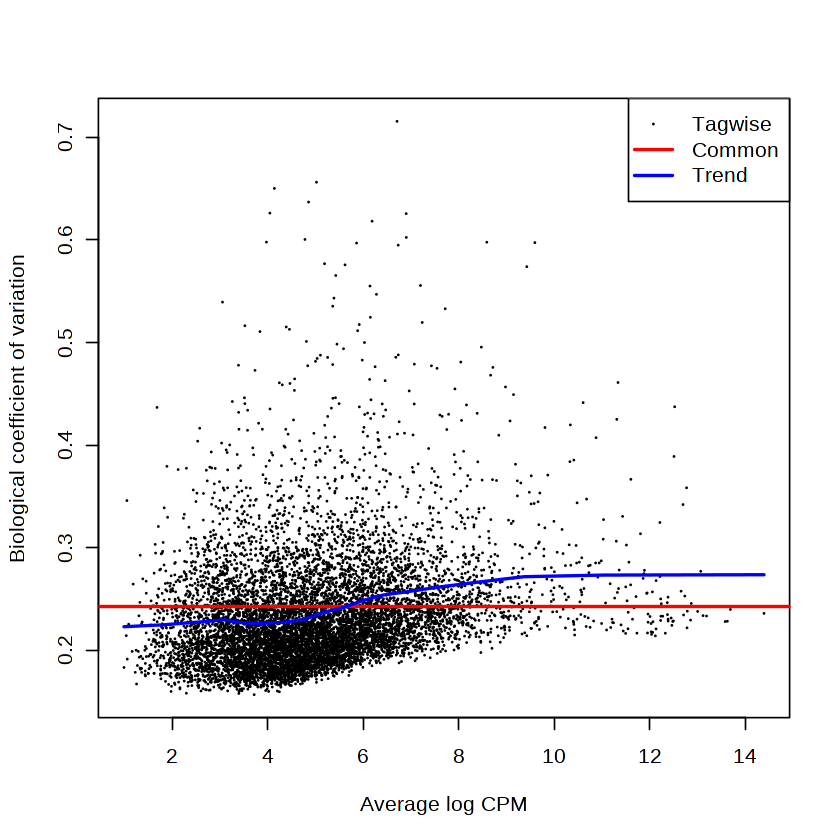

In [16]:
DEGs <- estimateDisp(DEGs, design = design)
DEGs$common.dispersion
plotBCV(DEGs)

fit <- glmQLFit(DEGs, design = design)
qlf <- glmQLFTest(fit)
tt <- topTags(qlf, n = Inf)
summary(decideTests(qlf))

#et <- exactTest(DEGs)
#et_FDR <- topTags(et, n = nrow(et$table), adjust.method = "BH", sort.by = "PValue", p.value = 1)

#out_temp <- et_FDR$table
#colnames(out_temp) <-paste("AD1.1_canonical",colnames(out_temp),sep="_")

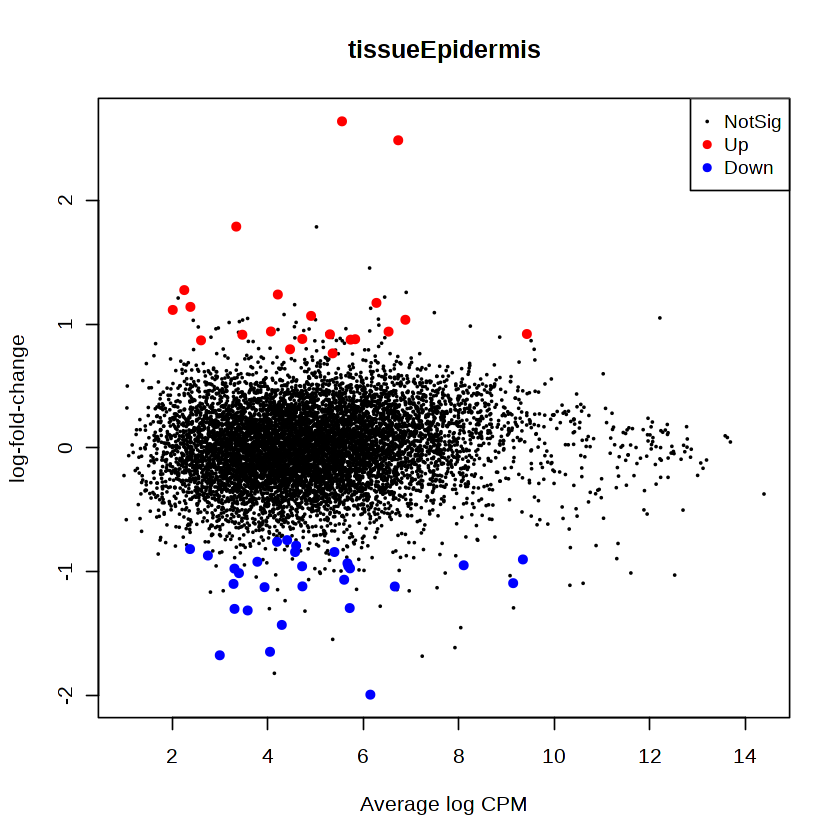

In [18]:
plotMD(qlf)

In [19]:
head(tt)

,logFC,logCPM,F,PValue,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NQO1,2.6397116,5.557657,69.48755,3.228137e-07,0.002881758
SHF,1.7886391,3.343778,45.27018,4.836710e-06,0.019977712
LIME1,-1.4313680,4.297150,42.85656,6.713693e-06,0.019977712
HIF1A-AS2,-1.3143693,3.583119,40.65246,9.169490e-06,0.020464010
JAK3,-0.9333263,5.671763,36.70479,1.655569e-05,0.025322103
LUCAT1,1.2755483,2.255843,36.51013,1.706506e-05,0.025322103


In [20]:
write.table(tt$table, file='/home/jovyan/farm/CTCL/DEG-condition-psudobulk/DEG-skin-layer.xls',quote=F,sep="\t")